# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# Library stack
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

x train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)
dimensions of images: (32, 32, 3)
Number of classes: 100


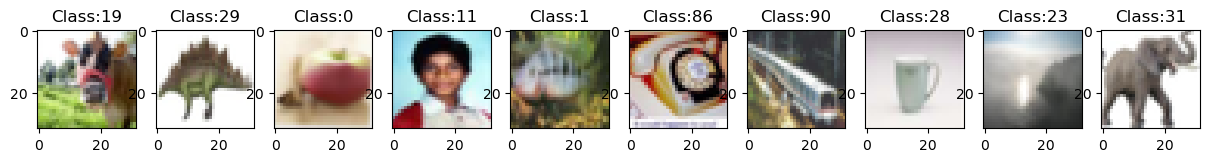

In [3]:
# Your code here

# Examine shape of training and test sets
print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

# Examine dimensions of the images
print(f"dimensions of images: {x_train.shape[1:]}")

# Number of Classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Ten examples of the training set
fig, axes = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Class:{y_train[i][0]}")
plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
# Normalize images
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255
# check range is 0 to 1
print(f'Min pix val:{x_train.min()}, Max pix val:{x_train.max()}')

# Convert labels to one-hot encoded vectors
y_train = to_categorical (y_train)
y_test = to_categorical (y_test)

# Split training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) 

# Check shape of the Training and Validation sets
print(f'Training set shape:{x_train.shape},{y_train.shape}')
print(f'Validation set shape:{x_val.shape},{y_val.shape}')

Min pix val:0.0, Max pix val:1.0
Training set shape:(40000, 32, 32, 3),(40000, 100)
Validation set shape:(10000, 32, 32, 3),(10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
# Your code here

# Baseline CNN model creation
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten output and add dense layer plus dropout layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(100, activation='softmax'))

# Print Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical cross entropy is preferred option for loss function of model as it is designed for multi-class problems
- <b>Optimizer:</b> Adam optimizer a good choice for image classification as it adjusts learning rate for each parameter individually. Also, efficient computation and less hyperparameter tuning required

In [6]:
from keras import optimizers

# Your code here
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here
# Training model
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/15
1250/1250 [==============================] - 80s 62ms/step - loss: 4.0822 - accuracy: 0.0701 - auc: 0.7504 - val_loss: 3.5793 - val_accuracy: 0.1395 - val_auc: 0.8417
Epoch 2/15
1250/1250 [==============================] - 70s 56ms/step - loss: 3.4314 - accuracy: 0.1705 - auc: 0.8588 - val_loss: 3.1396 - val_accuracy: 0.2253 - val_auc: 0.8889
Epoch 3/15
1250/1250 [==============================] - 75s 60ms/step - loss: 3.0974 - accuracy: 0.2351 - auc: 0.8897 - val_loss: 2.8372 - val_accuracy: 0.2906 - val_auc: 0.9119
Epoch 4/15
1250/1250 [==============================] - 71s 57ms/step - loss: 2.8486 - accuracy: 0.2816 - auc: 0.9075 - val_loss: 2.7549 - val_accuracy: 0.3062 - val_auc: 0.9164
Epoch 5/15
1250/1250 [==============================] - 1354s 1s/step - loss: 2.6584 - accuracy: 0.3176 - auc: 0.9205 - val_loss: 2.6513 - val_accuracy: 0.3299 - val_auc: 0.9188
Epoch 6/15
1250/1250 [==============================] - 79s 63ms/step - loss: 2.4978 - accuracy: 0.3487 - auc:

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Accuracy = 0.388 after 15 epochs. This equates to ~39% of images being correctly classified

- <b>Other metric:</b> AUC-ROC

- <b>Reason for selection:</b>  AUC-ROC is popular performance metric commonly used in classification tasks to evaluate how well a model distinguishes between classes, so it is an appropriate metric to use for this problem. It quantifies the overall ability of the model to discriminate between positive and negative classes, complementing the Accuracy metric for evaluating the model performance. Calculating AUC-ROC involves training the model, obtaining predicted probabilities, and using these probabilities to compute the ROC curve and AUC. An AUC of 1 indicates perfect discrimination, while an AUC of 0.5 indicates no discrimination (random guessing).

- <b>Value of metric:</b>  0.90

- <b>Interpretation of metric value:</b> A very good model that discriminates between positive and negative classes well.

In [8]:
# Model metrics summary
test_loss, test_accuracy, test_auc = model.evaluate(x_test, y_test)

print(f'Test Loss:{test_loss:.4f}')
print(f'Test Acc.:{test_accuracy:.4f}')
print(f'Test area under curve:{test_auc:.4f}')

313/313 [==============================] - 2s 8ms/step - loss: 2.6200 - accuracy: 0.3808 - auc: 0.9046
Test Loss:2.6200
Test Acc.:0.3808
Test area under curve:0.9046


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

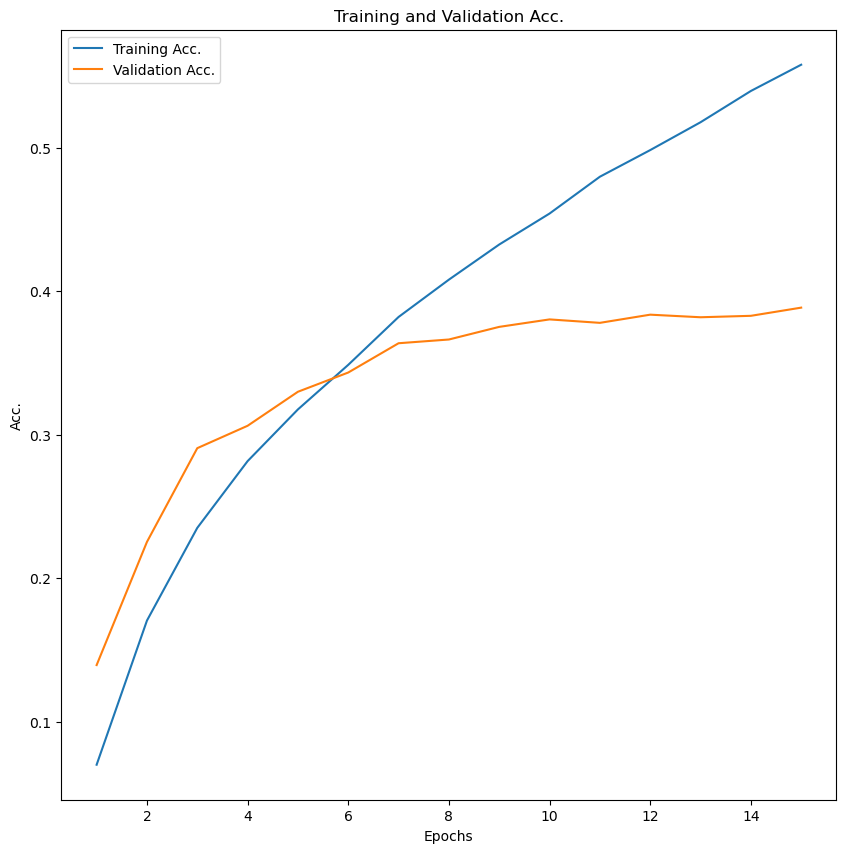

In [9]:
# Your code here

# Extract values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot
plt.figure(figsize=(10, 10))
plt.plot(range(1, 16), train_accuracy, label='Training Acc.')
plt.plot(range(1, 16), val_accuracy, label='Validation Acc.')

plt.ylabel('Acc.')
plt.xlabel('Epochs')
plt.title('Training and Validation Acc.')
plt.legend()
plt.show()

313/313 [==============================] - 3s 6ms/step


(-0.5, 31.5, 31.5, -0.5)

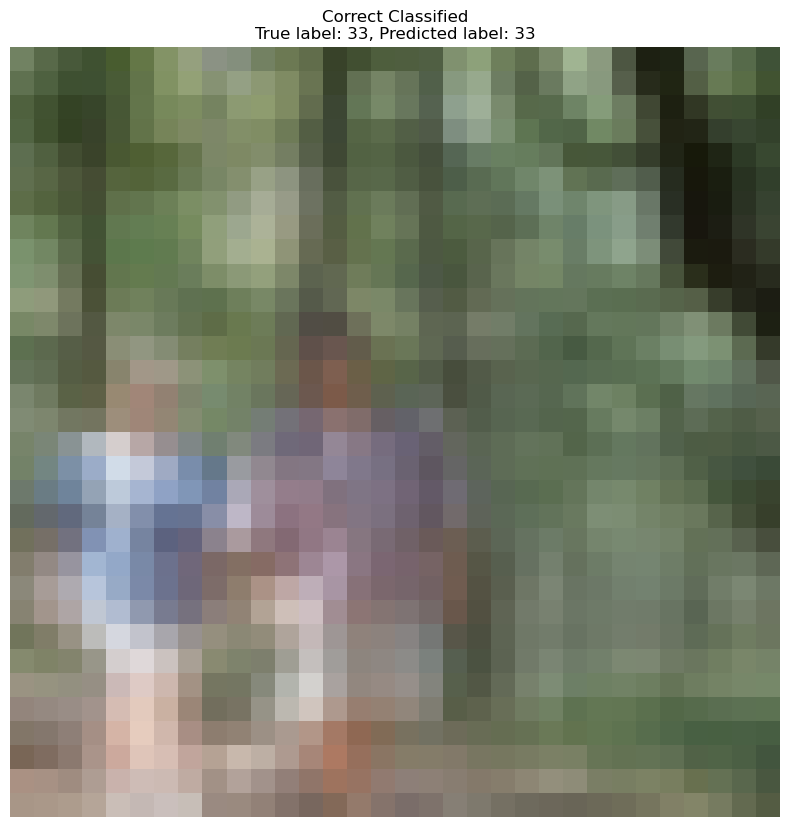

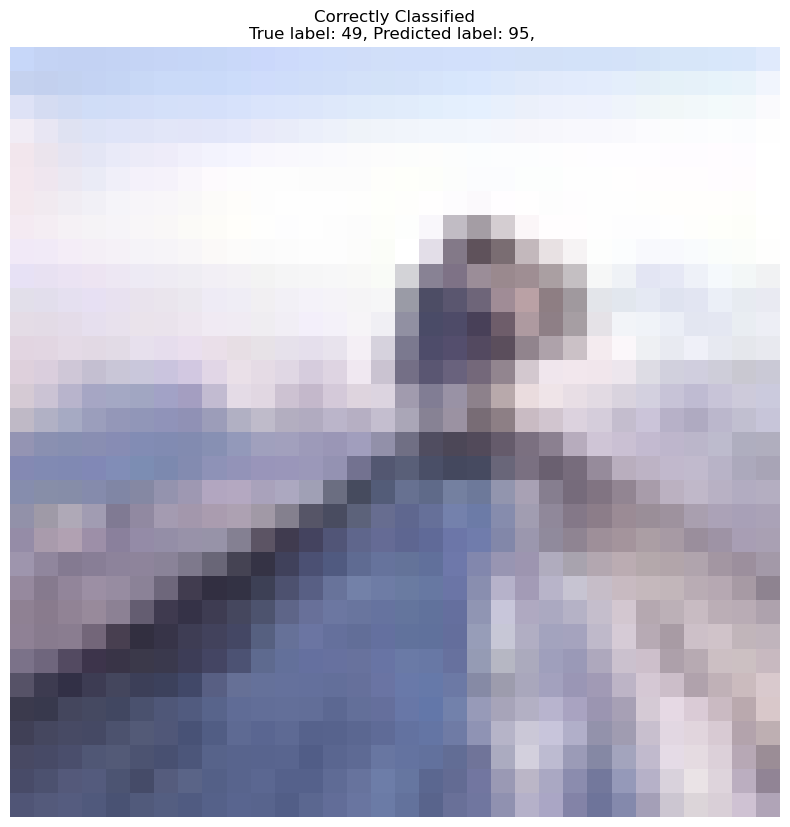

In [10]:
# Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set.
# Plot the images and report the model's classification probabilities for each.

predictions = model.predict(x_test)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_categories == true_categories)[0]
incorrect_indices = np.where(predicted_categories != true_categories)[0]

# image selection and probability
correct = correct_indices[0]
incorrect = incorrect_indices[0]

# plot correct image
plt.figure(figsize=(10, 10))
plt.imshow(x_test[correct])
plt.title(f"Correct Classified\nTrue label: {true_categories[correct]}, Predicted label: {predicted_categories[correct]}")
plt.axis('off')


# plot incorrect image
plt.figure(figsize=(10, 10))
plt.imshow(x_test[incorrect])
plt.title(f"Correctly Classified\nTrue label: {true_categories[incorrect]}, Predicted label: {predicted_categories[incorrect]}, ")
plt.axis('off')

# having issues coding the probabilities onto the plot :(

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.

I am using Data Augmentation. This is an advanced technique used to increase the diversity of training data without actually collecting new data. Data augmentation helps improve the generalization capability of models by introducing variations in the training data, thereby reducing overfitting. My code below focuses on geometric transformations, as an example, randomly rotating images within 20 degrees and shear transformations. I am doing this to provide for variations in the training data, with the aim to expose the model to more observations ---> improved accuracy and lower losses.

- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Fine tuned rotaion, width/ehight shifts, shear and zoom transformations within the Data Augmentation technique. I ran a couple of iterations with different permutations to fine-tune the hyperparameters. It was better not to go too extreme on any one hyperparameter.

In [11]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Original model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flatten output and add dense layer plus dropout layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))

# Add data augmentatiomn
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
)

#configuring the training process
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [12]:
# Your code here

history_enhanced = model.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
1250/1250 [==============================] - 82s 64ms/step - loss: 4.1145 - accuracy: 0.0603 - auc: 0.7452 - val_loss: 3.6900 - val_accuracy: 0.1230 - val_auc: 0.8274
Epoch 2/15
1250/1250 [==============================] - 77s 61ms/step - loss: 3.6301 - accuracy: 0.1353 - auc: 0.8346 - val_loss: 3.2956 - val_accuracy: 0.1932 - val_auc: 0.8749
Epoch 3/15
1250/1250 [==============================] - 77s 61ms/step - loss: 3.3480 - accuracy: 0.1847 - auc: 0.8670 - val_loss: 3.0416 - val_accuracy: 0.2419 - val_auc: 0.8992
Epoch 4/15
1250/1250 [==============================] - 75s 60ms/step - loss: 3.1610 - accuracy: 0.2209 - auc: 0.8830 - val_loss: 2.8913 - val_accuracy: 0.2780 - val_auc: 0.9098
Epoch 5/15
1250/1250 [==============================] - 75s 60ms/step - loss: 3.0293 - accuracy: 0.2475 - auc: 0.8937 - val_loss: 2.7988 - val_accuracy: 0.2913 - val_auc: 0.9122
Epoch 6/15
1250/1250 [==============================] - 76s 60ms/step - loss: 2.9204 - accuracy: 0.2677 - auc:

In [13]:
# Model metrics summary
test_loss, test_accuracy, test_auc = model.evaluate(x_test, y_test)

print(f'Test Loss:{test_loss:.4f}')
print(f'Test Acc.:{test_accuracy:.4f}')
print(f'Test area under curve:{test_auc:.4f}')

313/313 [==============================] - 2s 8ms/step - loss: 2.3951 - accuracy: 0.3834 - auc: 0.9329
Test Loss:2.3951
Test Acc.:0.3834
Test area under curve:0.9329


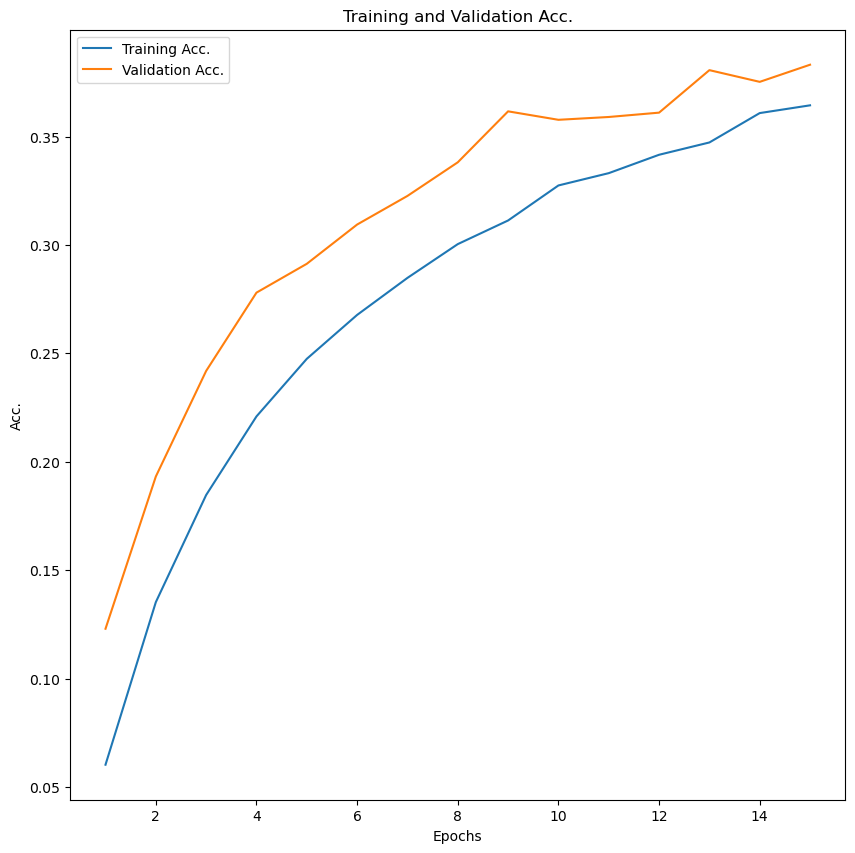

In [14]:
# Extract values
train_accuracy2 = history_enhanced.history['accuracy']
val_accuracy2 = history_enhanced.history['val_accuracy']

# Plot
plt.figure(figsize=(10, 10))
plt.plot(range(1, 16), train_accuracy2, label='Training Acc.')
plt.plot(range(1, 16), val_accuracy2, label='Validation Acc.')

plt.ylabel('Acc.')
plt.xlabel('Epochs')
plt.title('Training and Validation Acc.')
plt.legend()
plt.show()

313/313 [==============================] - 2s 6ms/step


(-0.5, 31.5, 31.5, -0.5)

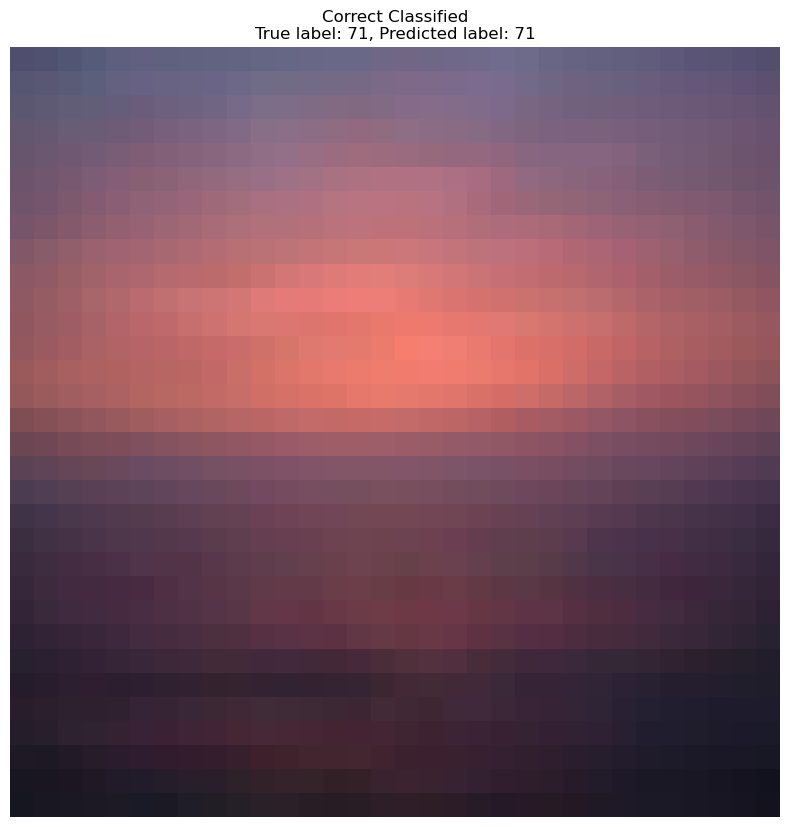

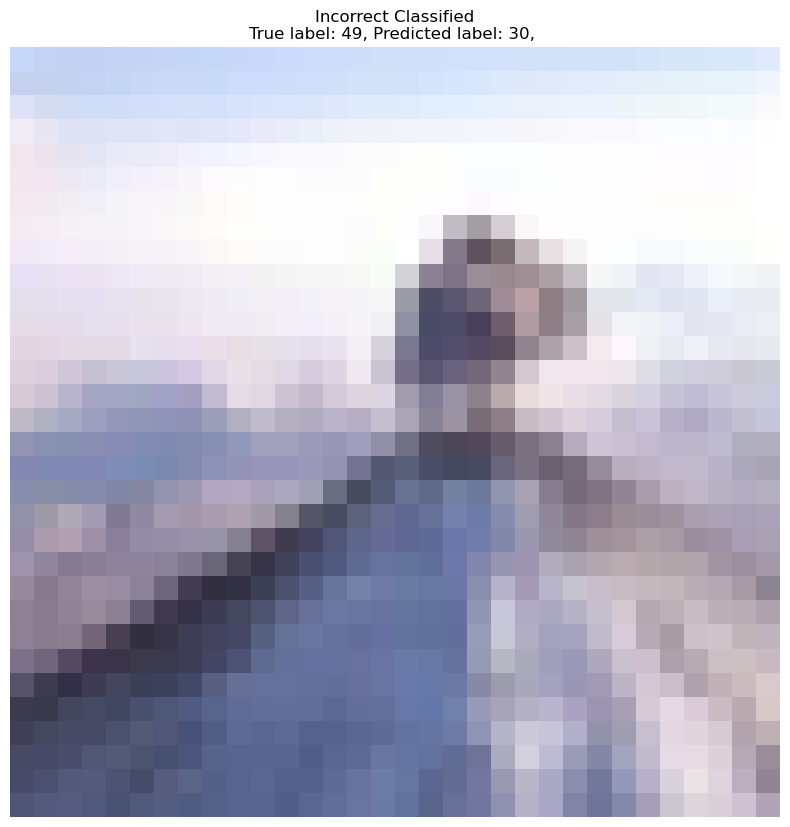

In [16]:
predictions2 = model.predict(x_test)
predicted_categories2 = np.argmax(predictions2, axis=1)
true_categories2 = np.argmax(y_test, axis=1)
correct_indices2 = np.where(predicted_categories2 == true_categories2)[0]
incorrect_indices2 = np.where(predicted_categories2 != true_categories2)[0]

# image selection and probability
correct2 = correct_indices2[0]
incorrect2 = incorrect_indices2[0]

# plot correct image
plt.figure(figsize=(10, 10))
plt.imshow(x_test[correct2])
plt.title(f"Correct Classified\nTrue label: {true_categories2[correct2]}, Predicted label: {predicted_categories2[correct2]}")
plt.axis('off')


# plot incorrect image
plt.figure(figsize=(10, 10))
plt.imshow(x_test[incorrect2])
plt.title(f"Incorrect Classified\nTrue label: {true_categories2[incorrect2]}, Predicted label: {predicted_categories2[incorrect2]}, ")
plt.axis('off')

# having issues coding the probabilities onto the plot :(

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
# Your answer here

Results
Baseline model:
Epoch 15/15
loss: 1.5452 - accuracy: 0.5577 - auc: 0.9721 - val_loss: 2.5953 - val_accuracy: 0.3885 - val_auc: 0.9067

Enhanced model: Training AUC, Accuracy and Loss:
Epoch 15/15
loss: 2.4633 - accuracy: 0.3644 - auc: 0.9294 - val_loss: 2.3992 - val_accuracy: 0.3831 - val_auc: 0.9319

Model performance did not improve but there is better convergence of training accuracy and validation accuracy for the enhanced model. I thought there would be a substantial improvement in accuracy using the data augmentation layer, especially as this introduces more diversity in the traingin data to further generalize the model. However, better convergence of training accuracy and validation accuracy for the enhanced model proves that the data augmentation layer has reduced overfitting.

There is definitely room for improvement. CIFAR-100 benchmark is now in the high 90's for accuracy. Ways to improve the model include:
- creating a larger neural net with more layers to increase the number of parameters
- more epochs
- introduce more enhanced layers in the neural net such as Keras "earlystopping"
- improve fine tuning of the hyperparameters
- increase access to compute

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.